In [6]:
import cv2
import matplotlib.pyplot as plt
import copy

%matplotlib inline

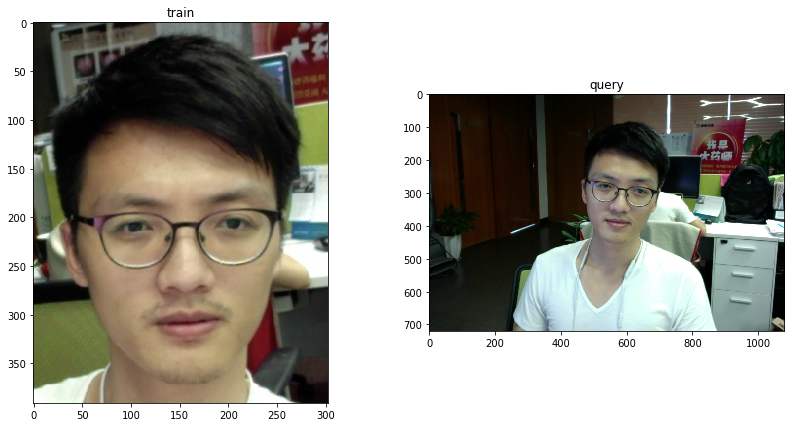

In [44]:
plt.rcParams['figure.figsize'] = (14,7)

img_1 = cv2.imread('images/my_thump.jpg')
img_2 = cv2.imread('images/Photo on 7-29-18 at 3.06 PM.jpg')

img_train = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_query = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

train_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
query_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

plt.subplot(121)
plt.imshow(img_train)
plt.title('train')

plt.subplot(122)
plt.imshow(img_query)
plt.title('query');

keypoints in train is 258
keypoints in query is 1448


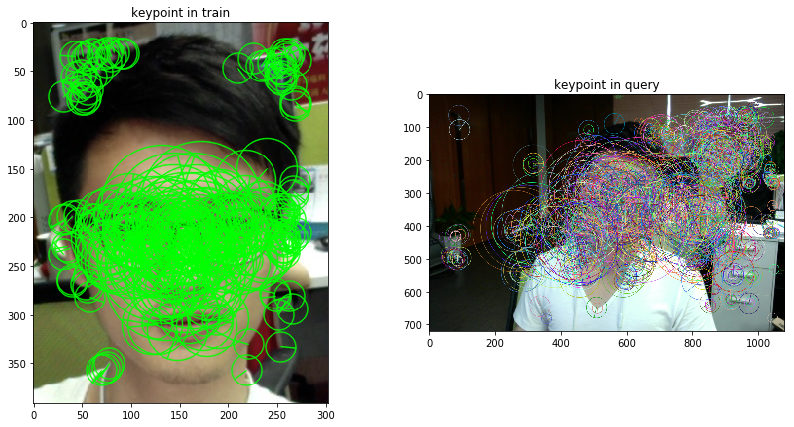

In [45]:
orb = cv2.ORB_create(5000, 2.0)
keypoints_train, descriptors_train = orb.detectAndCompute(train_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

print('keypoints in train is %d' % len(keypoints_train))
print('keypoints in query is %d' % len(keypoints_query))

key_img_train = copy.copy(img_train)
key_img_query = copy.copy(img_query)
key_img_train = cv2.drawKeypoints(img_train, keypoints_train, key_img_train, color = (0, 255,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
key_img_query = cv2.drawKeypoints(img_query, keypoints_query, key_img_query, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.rcParams['figure.figsize'] = (14,7)

plt.subplot(121)
plt.imshow(key_img_train)
plt.title('keypoint in train')

plt.subplot(122)
plt.imshow(key_img_query)
plt.title('keypoint in query');

keypoints that matched is 241


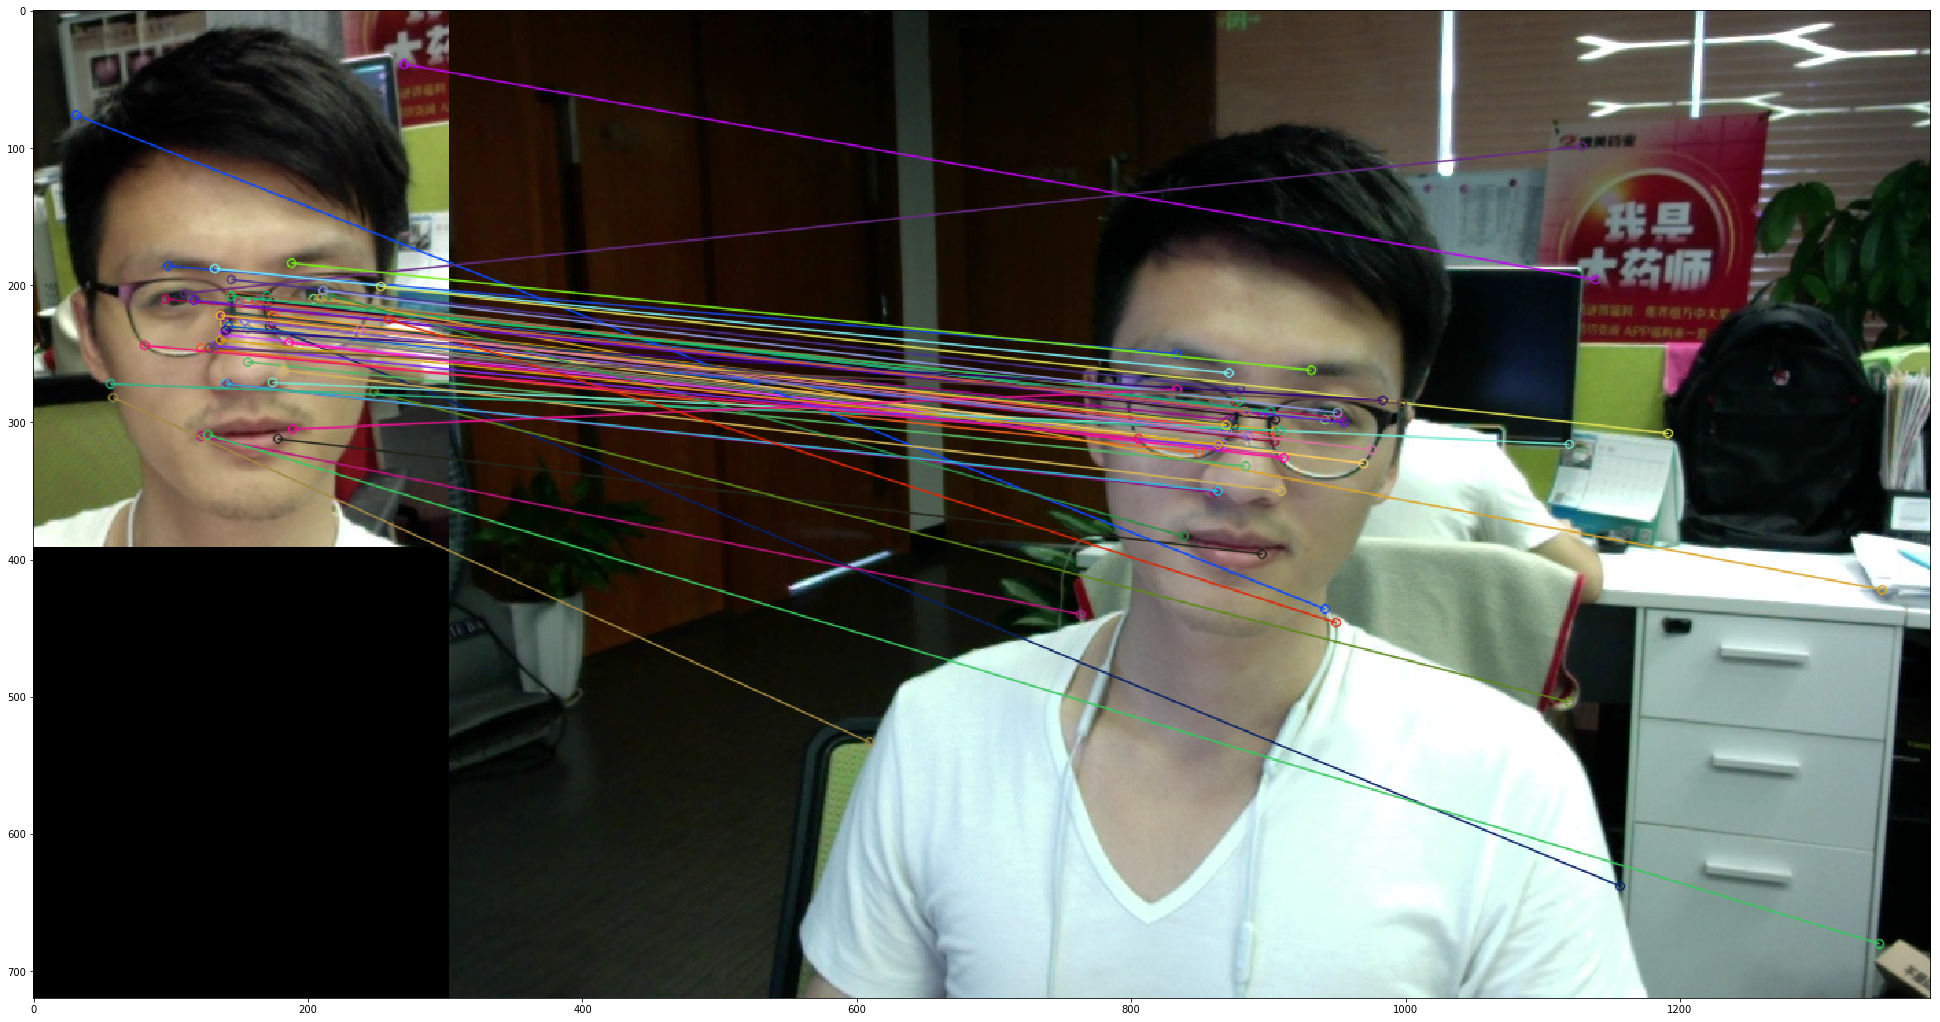

In [46]:
plt.rcParams['figure.figsize'] = [34, 34]

bf = cv2.BFMatcher(normType = cv2.NORM_HAMMING,
                   crossCheck = True)
matchs = bf.match(descriptors_train, descriptors_query)

print('keypoints that matched is %d' % len(matchs))

matchs = sorted(matchs, key=lambda x: x.distance)

match_result = copy.copy(img_train)
match_result = cv2.drawMatches(img_train, keypoints_train, img_query, keypoints_query, matchs[:60], match_result, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.imshow(match_result);

In [71]:
!python3 realtime_ORB.py

Traceback (most recent call last):
  File "realtime_ORB.py", line 28, in <module>
    matchs = bf.match(descriptors_train, descriptors_query)
cv2.error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/batch_distance.cpp:238: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == 5 || type == 0) in function 'batchDistance'

